<a href="https://colab.research.google.com/github/Sir-Thinkalot/College-Materials/blob/main/Image%20Processing/Image-Restoration-1/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
!git clone https://github.com/Sir-Thinkalot/College-Materials

fatal: destination path 'College-Materials' already exists and is not an empty directory.


(537, 537, 3)

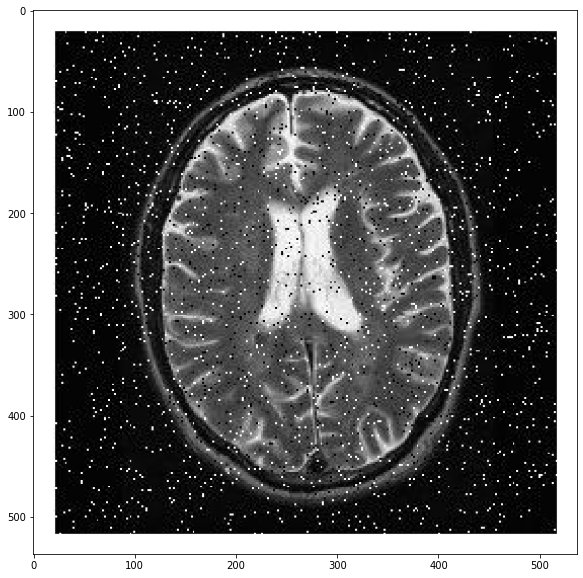

In [85]:
import imageio
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
  
im1 = imageio.imread('/content/College-Materials/Image Processing/Image-Restoration-1/MRI Brain 1.jpg')
fig, axes = plt.subplots(1,1, figsize=(20,10))
axes.imshow(im1,cmap='gray')
im1.shape

In [86]:
weights = np.full((5,5,3),1/(5*5*3))
weights

array([[[0.01333333, 0.01333333, 0.01333333],
        [0.01333333, 0.01333333, 0.01333333],
        [0.01333333, 0.01333333, 0.01333333],
        [0.01333333, 0.01333333, 0.01333333],
        [0.01333333, 0.01333333, 0.01333333]],

       [[0.01333333, 0.01333333, 0.01333333],
        [0.01333333, 0.01333333, 0.01333333],
        [0.01333333, 0.01333333, 0.01333333],
        [0.01333333, 0.01333333, 0.01333333],
        [0.01333333, 0.01333333, 0.01333333]],

       [[0.01333333, 0.01333333, 0.01333333],
        [0.01333333, 0.01333333, 0.01333333],
        [0.01333333, 0.01333333, 0.01333333],
        [0.01333333, 0.01333333, 0.01333333],
        [0.01333333, 0.01333333, 0.01333333]],

       [[0.01333333, 0.01333333, 0.01333333],
        [0.01333333, 0.01333333, 0.01333333],
        [0.01333333, 0.01333333, 0.01333333],
        [0.01333333, 0.01333333, 0.01333333],
        [0.01333333, 0.01333333, 0.01333333]],

       [[0.01333333, 0.01333333, 0.01333333],
        [0.01333333, 0.013

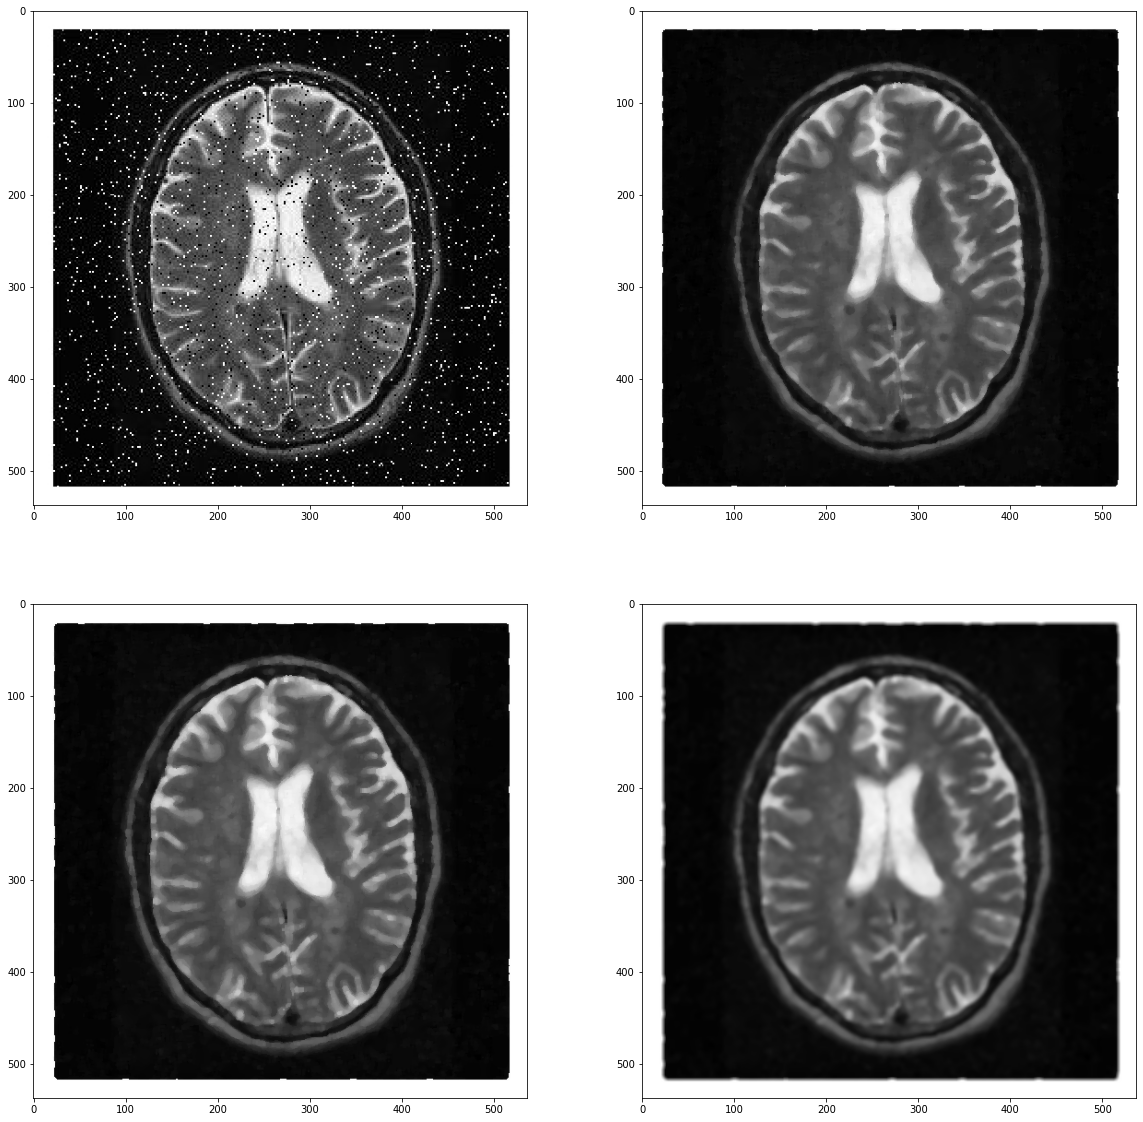

In [87]:
#im1_filt = ndi.minimum_filter(im1,size=2)
im1_filt = ndi.median_filter(im1,size=7)
im1_filt1 = ndi.maximum_filter(im1_filt,size=2)
im1_filt2 = ndi.convolve(im1_filt1,weights)
fig, axes = plt.subplots(2,2, figsize=(20,20))
axes[0,0].imshow(im1,cmap='gray')
axes[0,1].imshow(im1_filt,cmap='gray')
axes[1,0].imshow(im1_filt1,cmap='gray')
axes[1,1].imshow(im1_filt2,cmap='gray')
plt.show()

In [88]:
im1_mean = np.mean(im1_filt2)           #Mean
im1_std = np.std(im1_filt2)             #Standard Deviation
im1_ENL = np.square(im1_mean/im1_std)   #Equivalent Number of Looks
[im1_mean,im1_std,im1_ENL]

[81.43465837173899, 88.13650391942797, 0.8537032182052474]

In [103]:
im1_mean = np.mean(im1)           #Mean
im1_std = np.std(im1)             #Standard Deviation
im1_ENL = np.square(im1_mean/im1_std)   #Equivalent Number of Looks
[im1_mean,im1_std,im1_ENL]

[82.73583845697699, 93.14614271532507, 0.7889647410216243]

In [102]:
im1_MSE = np.square(np.subtract(im1,im1_filt2)).mean() #Mean Squared Error
im1_PSNR = 10*np.log10(np.square(255)/im1_MSE)         #Peak Signal-to-Noise Ratio
[im1_MSE,im1_PSNR]

[50.15502359823698, 31.127659217821048]

In [90]:
im1_Contrast = np.absolute(np.mean(im1)-np.mean(im1_filt2))               #Contrast
im1_Noise = np.sqrt(np.square(np.std(im1))+np.square(np.std(im1_filt2)))  #Noise
im1_CNR = im1_Contrast/im1_Noise                                          #Contrast to Noise Ratio
im1_CNR

0.01014683057803416

(258, 258)

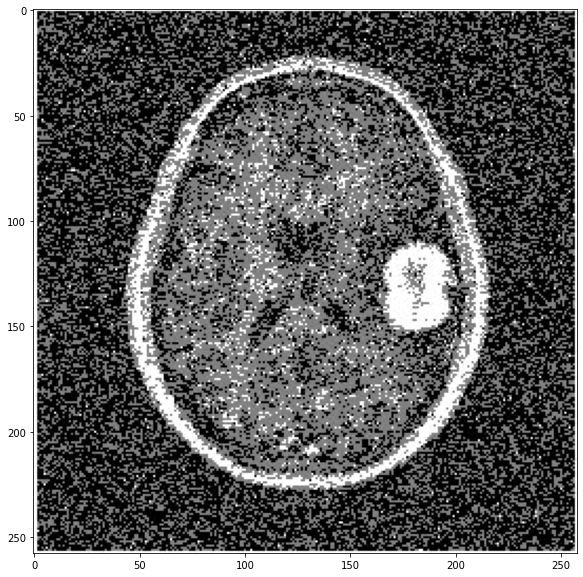

In [91]:
im2 = imageio.imread('/content/College-Materials/Image Processing/Image-Restoration-1/MRI Brain 2.jpg')
fig, axes = plt.subplots(1,1, figsize=(20,10))
axes.imshow(im2,cmap='gray')
im2.shape

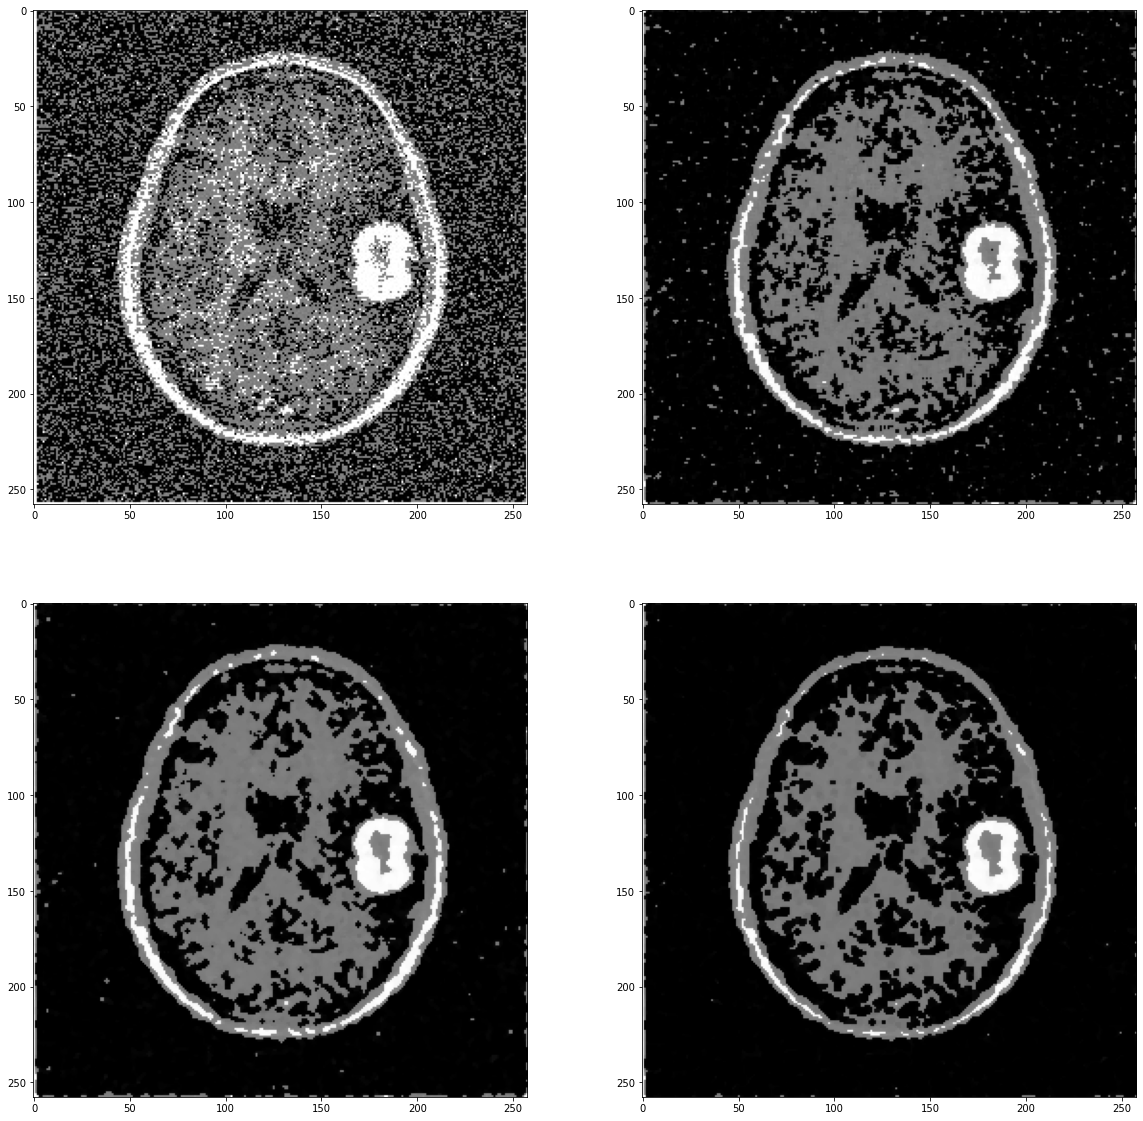

In [101]:
im2_filt = ndi.percentile_filter(im2,25,size=3)
im2_filt1 = ndi.median_filter(im2_filt,size=3)
im2_filt2 = ndi.minimum_filter(im2_filt1,size=2)
fig, axes = plt.subplots(2,2, figsize=(20,20))
axes[0,0].imshow(im2,cmap='gray')
axes[0,1].imshow(im2_filt,cmap='gray')
axes[1,0].imshow(im2_filt1,cmap='gray')
axes[1,1].imshow(im2_filt2,cmap='gray')
plt.show()

In [95]:
im2_mean = np.mean(im2_filt2)           #Mean
im2_std = np.std(im2_filt2)             #Standard Deviation
im2_ENL = np.square(im2_mean/im2_std)   #Equivalent Number of Looks
[im2_mean,im2_std,im2_ENL]

[32.952361636920855, 60.006941030666795, 0.30155748570868673]

In [104]:
im2_mean = np.mean(im2)           #Mean
im2_std = np.std(im2)             #Standard Deviation
im2_ENL = np.square(im2_mean/im2_std)   #Equivalent Number of Looks
[im2_mean,im2_std,im2_ENL]

[83.37678024157202, 82.1917049273573, 1.0290447503865687]

In [96]:
im2_MSE = np.square(np.subtract(im2,im2_filt1)).mean() #Mean Squared Error
im2_PSNR = 10*np.log10(np.square(255)/im2_MSE)         #Peak Signal-to-Noise Ratio
[im2_MSE,im2_PSNR]

[30.18507000781203, 33.33288173424114]

In [97]:
im2_Contrast = np.absolute(np.mean(im2)-np.mean(im2_filt2))               #Contrast
im2_Noise = np.sqrt(np.square(np.std(im2))+np.square(np.std(im2_filt2)))  #Noise
im2_CNR = im2_Contrast/im2_Noise                                          #Contrast to Noise Ratio
im2_CNR

0.4954939916109078